# Experiments with HSV Color Spaces

The previous Filtering and Border Extraction tests have been done mostly in Greyscale, only using differences in brightness of pixels to isolate regions of interest. Differences in color are not accounted for. It would seem like the color information could be very usefull, however working in RGB space is unintuitive. Let convert to HSV color space and see what sorts of groupings might be possible. 

In [45]:
%matplotlib notebook

import os
from PIL import Image
from numpy import *
from pylab import *

all_images = []
img_path = 'PH2Dataset/PH2 Dataset images/IMD002/IMD002_Dermoscopic_Image/IMD002.bmp'
all_image_root = 'PH2Dataset/PH2 Dataset images'

#gather all images in all_image_root and store them in all_images
def gather_images():
    for dirpath, dirnames, filenames in os.walk(all_image_root):
        for filename in [f for f in filenames if ( f.endswith(".bmp") and "_" not in f  )]:
            all_images.append(os.path.join(dirpath, filename))

gather_images()

## Little 3d plotting Test to get started

<IPython.core.display.Javascript object>


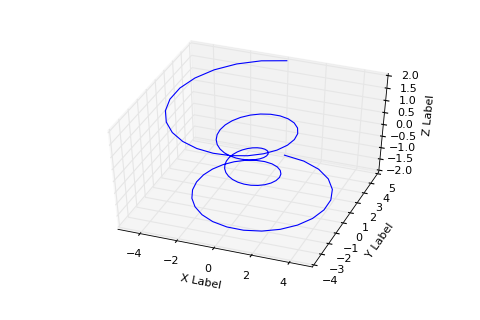

In [46]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

theta = np.linspace(-4 * np.pi, 4 * np.pi, 100) # prepare 100 theta angle values
z = np.linspace(-2, 2, 100)                     # prepare 100 z (height) values
r = z**2 + 1                                    # 100 radius values
x = r * np.sin(theta)                           # calculate 100 x values from the radii and thetas
y = r * np.cos(theta)                           # calculate 100 y values from the radii and thetas
ax.plot(x, y, z, label='parametric curve')      # put the x, y, z values all together and plot

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

show()


# Plot a couple of RGB Pixels in HSV Space

HSV stands for Hue, Saturation, Value. 
Hue is measured in degrees going from 0° = Red, 120° = Green, 240° = Blue and back to 360° = Red
The Hue can be undefined when the Saturation is 0, meaning that a pixel has no color value.


In [47]:
from matplotlib.colors import rgb_to_hsv

red_pixel_rgb = [1.0, 0.0, 0.0]
green_pixel_rgb = [0.0, 1.0, 0.0]
blue_pixel_rgb = [0.0, 0.0, 1.0]

pixels = array([red_pixel_rgb, green_pixel_rgb, blue_pixel_rgb])

print(rgb_to_hsv(pixels))

[[ 0.          1.          1.        ]
 [ 0.33333333  1.          1.        ]
 [ 0.66666667  1.          1.        ]]


Ok, Matplotlib uses float values for H, from 0.0 to 1.0

Lets, plot the 3 points in 3d space, use the color of the pixel as the pixel's color.

<IPython.core.display.Javascript object>


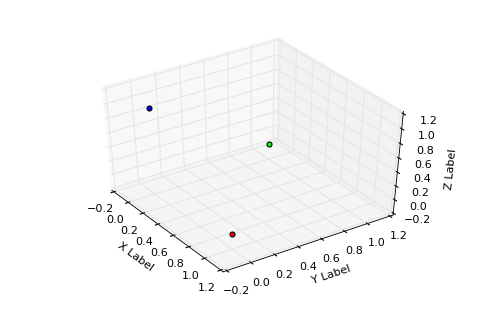

In [48]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# loop through pixels array and add each pixel as item in scatter plot
for pixel in pixels:
    x = pixel[0]
    y = pixel[1]
    z = pixel[2]
    color = pixel
    marker = 'o'
    
    ax.scatter(x,y,z,c=color,marker=marker)
    
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

Ok, but that is not HSV space yet.
We need to map the rgb pixel coordinates to HSV space.
* Z Coordinate will be V ( lightness / darkness of pixel ):
* X is cos(H * pi) * S
* Y is sin(-H * pi) * S

Let's try again:

<IPython.core.display.Javascript object>


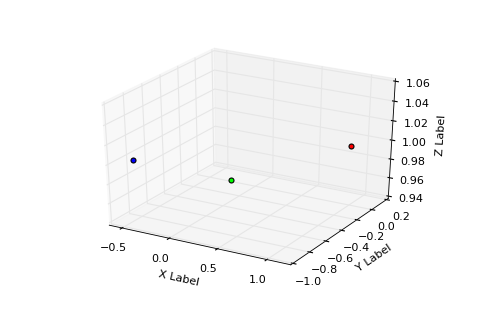

In [49]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# loop through pixels array and add each pixel as item in scatter plot
for pixel in pixels:
    [(H, S, V)] =  rgb_to_hsv([pixel]) # convert to H,S,V
    x = cos(H*pi) * S
    y = sin(-H * pi) * S
    z = V
    color = pixel
    marker = 'o'
    
    ax.scatter(x,y,z,c=color,marker=marker)
    
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

Hard to tell what it going on. Let's make a whole bunch of Pixels.

<IPython.core.display.Javascript object>


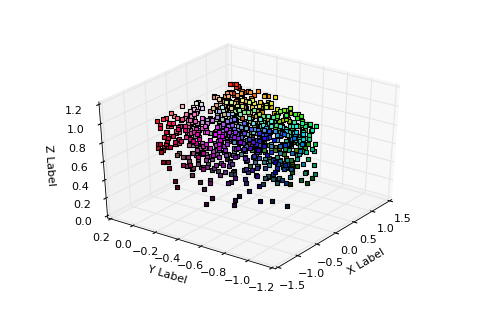

In [50]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


many_pixels = np.random.rand(800,3)

# loop through pixels array and add each pixel as item in scatter plot
for pixel in many_pixels:
    [(H, S, V)] =  rgb_to_hsv([pixel]) # convert to H,S,V
    x = cos(H*pi) * S
    y = sin(-H * pi) * S
    z = V
    color = pixel
    marker = ','
    
    ax.scatter(x,y,z,c=color,marker=marker)
    
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()